<h1>CatBoost in Classification (CatBoost)</h1>
<h3>We will be using the gradient boosting algorithm implementation in the open-source CatBoost Library, which is a third-party library developed by researchers and engineers at the Russian search engine company - Yandex.</h3>
<br>In this notebook, we will construct a Gradient Boosting ML Tree Model (CatBoost) to help us classify a salary class based on our selected features.
<br>The Catboost open-source library provides the Gradient Boosting algorithm on decision trees for classification via the CatBoostClassifier class.
<br>In our initial model, the Decision Tree Classifier, the optimal model provided a f1 score is 0.53621. Hence, we will use that score as a benchmark to improve on.
<br>
<br>CatBoost is able to build symmetric (balanced) trees, unlike XGBoost and LightGBM. This helps with an efficient CPU implementation, decreases the overall prediction time, makes more swift model appliers, and controls overfitting as the structure serves as a regularization. Furthermore, it implements Ordered Boosting, which trains a model using a permutation-driven approach on a subset of data while calculating residuals on another subset, thus preventing both overfitting of data and target leakage.

<br> ref.: https://neptune.ai/blog/when-to-choose-catboost-over-xgboost-or-lightgbm

<b>Importing of all essential libraries</b>

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#CatBoost
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
sb.set() # set the default Seaborn style for graphics

<b>Importing our train and test datasets</b>

In [3]:
X_train = pd.read_csv('Data/x_train.csv')
y_train = pd.read_csv('Data/y_train.csv')

X_test = pd.read_csv('Data/x_test.csv')
y_test = pd.read_csv('Data/y_test.csv')

#feature engineered dataset
X_testEGIN = pd.read_csv('Data/x_testEGIN.csv')
X_trainEGIN = pd.read_csv('Data/x_trainEGIN.csv')

<b>Checking our train and test datasets</b>

In [4]:
print("==================x_test==================")
X_test.info()
print("\n==================x_train==================")
X_train.info()

print("\n==================y_test==================")
y_test.info()
print("\n==================y_train==================")
y_train.info()

print("==================EGIN_x_test==================")
X_testEGIN.info()
print("\n==================EGIN_x_train==================")
X_trainEGIN.info()

==================x_test==================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12799 entries, 0 to 12798
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Education                            12799 non-null  int64
 1   Marital                              12799 non-null  int64
 2   Sex                                  12799 non-null  int64
 3   Age                                  12799 non-null  int64
 4   Race                                 12799 non-null  int64
 5   Veteran                              12799 non-null  int64
 6   Pro_Cert                             12799 non-null  int64
 7   Gov_Cert                             12799 non-null  int64
 8   Cert_Need                            12799 non-null  int64
 9   Disability                           12799 non-null  int64
 10  Citizenship                          12799 non-null  int64
 11  Last Week W

<b>Creating a Initial Base Model (Model Evaluation with fixed values of hyperparameters)</b>

<b>Our problem falls under the category of multi-class classification. The Base Model Evaluation will be done with a fixed set of values of hyperparameters for the classlification problem. We will initally have 300 iterations (meaning CatBoost will build 300 tress similar to n_estimator in the xgboost and the Scikit-Learn Gradeint Boosting Machine), a default learning rate of 0.1 (similar to the other tree-based models), the max depth for each of the trees is 3 and our CatBoost specific loss_function is MultiClass as defined back in our problem statement</b>

In [18]:
#creating catboost classifier obj and printing out the base model's parameters
CBC = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=3, loss_function='MultiClass')
print(CBC.get_params())

{'iterations': 300, 'learning_rate': 0.1, 'depth': 3, 'loss_function': 'MultiClass'}


<b>Training the Initial Base Model with the data from our regular dataset (non-feature engineered dataset)</b>

In [25]:
#train CB model with non-EGIN values
model_nonEGIN = CBC.fit(X_train, y_train.values.ravel())

0:	learn: 1.3418757	total: 89.9ms	remaining: 26.9s
1:	learn: 1.3088537	total: 191ms	remaining: 28.4s
2:	learn: 1.2820794	total: 266ms	remaining: 26.4s
3:	learn: 1.2588476	total: 372ms	remaining: 27.5s
4:	learn: 1.2379182	total: 447ms	remaining: 26.4s
5:	learn: 1.2209844	total: 518ms	remaining: 25.4s
6:	learn: 1.2059274	total: 627ms	remaining: 26.3s
7:	learn: 1.1936201	total: 708ms	remaining: 25.9s
8:	learn: 1.1826666	total: 795ms	remaining: 25.7s
9:	learn: 1.1715461	total: 896ms	remaining: 26s
10:	learn: 1.1626260	total: 972ms	remaining: 25.5s
11:	learn: 1.1532628	total: 1.05s	remaining: 25.1s
12:	learn: 1.1456927	total: 1.15s	remaining: 25.4s
13:	learn: 1.1386495	total: 1.24s	remaining: 25.3s
14:	learn: 1.1330233	total: 1.32s	remaining: 25.1s
15:	learn: 1.1275184	total: 1.46s	remaining: 25.9s
16:	learn: 1.1222579	total: 1.53s	remaining: 25.5s
17:	learn: 1.1171132	total: 1.63s	remaining: 25.5s
18:	learn: 1.1117050	total: 1.72s	remaining: 25.5s
19:	learn: 1.1067317	total: 1.83s	remainin

161:	learn: 0.9967298	total: 11.9s	remaining: 10.2s
162:	learn: 0.9965862	total: 12s	remaining: 10.1s
163:	learn: 0.9963051	total: 12.1s	remaining: 10s
164:	learn: 0.9961358	total: 12.2s	remaining: 9.96s
165:	learn: 0.9959459	total: 12.2s	remaining: 9.88s
166:	learn: 0.9957919	total: 12.3s	remaining: 9.78s
167:	learn: 0.9955800	total: 12.3s	remaining: 9.68s
168:	learn: 0.9950554	total: 12.4s	remaining: 9.6s
169:	learn: 0.9948965	total: 12.5s	remaining: 9.53s
170:	learn: 0.9946676	total: 12.5s	remaining: 9.45s
171:	learn: 0.9943975	total: 12.6s	remaining: 9.38s
172:	learn: 0.9943234	total: 12.7s	remaining: 9.29s
173:	learn: 0.9940149	total: 12.7s	remaining: 9.21s
174:	learn: 0.9938496	total: 12.8s	remaining: 9.12s
175:	learn: 0.9935766	total: 12.8s	remaining: 9.04s
176:	learn: 0.9935125	total: 12.9s	remaining: 8.95s
177:	learn: 0.9932590	total: 12.9s	remaining: 8.87s
178:	learn: 0.9930051	total: 13s	remaining: 8.78s
179:	learn: 0.9928356	total: 13s	remaining: 8.7s
180:	learn: 0.9926749	

F1 Score for Train Data: 0.5712353025377502
F1 Score for Test Data: 0.5700662060043097

Classificiation Report on Test Data:
               precision    recall  f1-score   support

           1       0.75      0.65      0.70      3276
           2       0.46      0.50      0.48      3193
           3       0.44      0.46      0.45      3230
           4       0.65      0.66      0.65      3100

    accuracy                           0.57     12799
   macro avg       0.58      0.57      0.57     12799
weighted avg       0.58      0.57      0.57     12799



<AxesSubplot:>

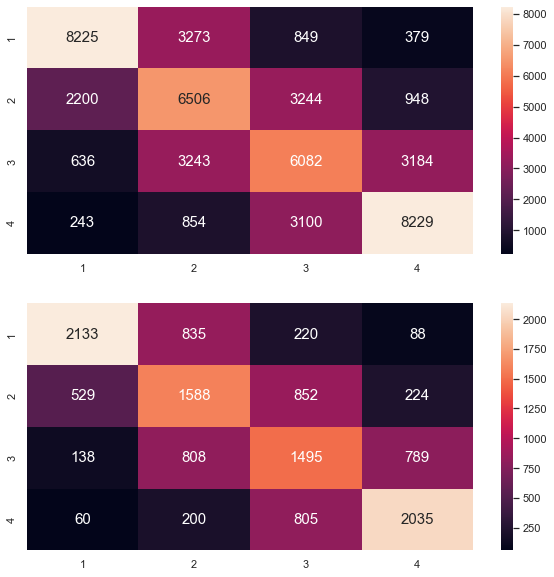

In [30]:
y_pred_test = model_nonEGIN.predict(X_test)
y_pred_train = model_nonEGIN.predict(X_train)

print('F1 Score for Train Data:', f1_score(y_train, y_pred_train, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_pred_test, average='macro'))

print('\nClassificiation Report on Test Data:\n', metrics.classification_report(y_test, y_pred_test))


fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, y_pred_train), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Training the Initial Base Model with the data from our feature engineered dataset</b>

In [32]:
#train CB model with EGIN values
model_EGIN = CBC.fit(X_trainEGIN, y_train.values.ravel())

0:	learn: 1.3446753	total: 116ms	remaining: 34.7s
1:	learn: 1.3097337	total: 189ms	remaining: 28.2s
2:	learn: 1.2840448	total: 253ms	remaining: 25.1s
3:	learn: 1.2601265	total: 349ms	remaining: 25.8s
4:	learn: 1.2386690	total: 444ms	remaining: 26.2s
5:	learn: 1.2213319	total: 546ms	remaining: 26.8s
6:	learn: 1.2062838	total: 629ms	remaining: 26.3s
7:	learn: 1.1927212	total: 721ms	remaining: 26.3s
8:	learn: 1.1815371	total: 807ms	remaining: 26.1s
9:	learn: 1.1706412	total: 879ms	remaining: 25.5s
10:	learn: 1.1610160	total: 992ms	remaining: 26.1s
11:	learn: 1.1522488	total: 1.08s	remaining: 25.9s
12:	learn: 1.1450406	total: 1.14s	remaining: 25.1s
13:	learn: 1.1383061	total: 1.22s	remaining: 24.9s
14:	learn: 1.1319224	total: 1.29s	remaining: 24.6s
15:	learn: 1.1256634	total: 1.38s	remaining: 24.5s
16:	learn: 1.1200636	total: 1.45s	remaining: 24.2s
17:	learn: 1.1140885	total: 1.52s	remaining: 23.9s
18:	learn: 1.1089312	total: 1.61s	remaining: 23.8s
19:	learn: 1.1046951	total: 1.67s	remaini

164:	learn: 0.9950370	total: 8.32s	remaining: 6.8s
165:	learn: 0.9948497	total: 8.35s	remaining: 6.74s
166:	learn: 0.9946923	total: 8.39s	remaining: 6.68s
167:	learn: 0.9942151	total: 8.42s	remaining: 6.62s
168:	learn: 0.9940882	total: 8.45s	remaining: 6.55s
169:	learn: 0.9939003	total: 8.49s	remaining: 6.49s
170:	learn: 0.9937335	total: 8.52s	remaining: 6.43s
171:	learn: 0.9935935	total: 8.56s	remaining: 6.37s
172:	learn: 0.9933866	total: 8.59s	remaining: 6.31s
173:	learn: 0.9931815	total: 8.62s	remaining: 6.24s
174:	learn: 0.9928537	total: 8.66s	remaining: 6.18s
175:	learn: 0.9926240	total: 8.69s	remaining: 6.12s
176:	learn: 0.9925473	total: 8.72s	remaining: 6.06s
177:	learn: 0.9922114	total: 8.75s	remaining: 6s
178:	learn: 0.9921201	total: 8.78s	remaining: 5.94s
179:	learn: 0.9919579	total: 8.81s	remaining: 5.87s
180:	learn: 0.9918836	total: 8.84s	remaining: 5.81s
181:	learn: 0.9917976	total: 8.87s	remaining: 5.75s
182:	learn: 0.9916797	total: 8.9s	remaining: 5.69s
183:	learn: 0.991

F1 Score for Train Data: 0.5719779792682531
F1 Score for Test Data: 0.5678675632558075

Classificiation Report on Test Data:
               precision    recall  f1-score   support

           1       0.74      0.65      0.69      3276
           2       0.46      0.49      0.48      3193
           3       0.44      0.46      0.45      3230
           4       0.64      0.66      0.65      3100

    accuracy                           0.56     12799
   macro avg       0.57      0.57      0.57     12799
weighted avg       0.57      0.56      0.57     12799



<AxesSubplot:>

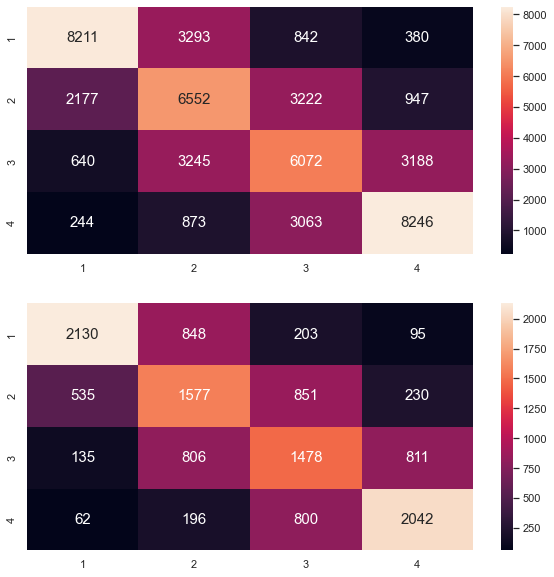

In [33]:
y_pred_testEGIN = model_EGIN.predict(X_testEGIN)
y_pred_trainEGIN = model_EGIN.predict(X_trainEGIN)

print('F1 Score for Train Data:', f1_score(y_train, y_pred_trainEGIN, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_pred_testEGIN, average='macro'))

print('\nClassificiation Report on Test Data:\n', metrics.classification_report(y_test, y_pred_testEGIN))

fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, y_pred_trainEGIN), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_pred_testEGIN), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])


<b>Insights</b>
<br>We see that the Base CatBoost classifier for both the regular (f1-score=0.57006) and feature engineered (f1-score=0.56786) datasets does appear to perform MUCH better than our previous decision tree classifier(f1-score=0.53621). (Note: We are comparing the f1 scores for the test data between models)
<br>
<br> Between the regular and feature engineered datasets, the difference in the f1 scores does differ by a 
comparable margin so we can see how for this model, feature engineering does not help much, and in fact gives a slightly lower f1 score than the regular dataset (diff=0.0022).
<br>
<br>Checking for Overfitting: Both the training and test set accuracy are quite comparable, much closer in f1-scores than the gradient booting models on Scikit-Learn and XGBoosting. So, we can say that there is very little overfitting, much less compared to the SciKit-Learn and XGBoost.
<br>
<br>We will now further finetune our regular model's hyperparameters to improve the model’s performance

<h3>Hyperparameters Tuning</h3>



For our model, we can tune the  maximum number of trees generated in the model <b>(iterations)</b>, max_depth of any one tree in the model <b>(depth)</b> and learning weights assigned predictions from each tree in the model <b>(learning_rate)</b>. 

<br>
We will use <b>RandomSearchCV</b> to obtain the optimal hyperparameters through a cross validation process.

<b>Importing the RandomSearchCV function from sklearn</b>

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

<b>Obtaining optimal hyperparameters through cross validation using RandomSearchCV</b>
<br>
<br>For the CatBoost, there are 3 main hyperparameters we can tune: (iterations), (depth) & (learning_rate).
<br>An extensive list can be found here: https://catboost.ai/en/docs/concepts/parameter-tuning
<br>
<br>We selected to tune only the following hyperparameters with a specified range (found through research and documentation on the catboost website) to find the model with the best performance as they are the most consequential hyperparameters for the model.
<br>
<br>We are using RandomSearchCV as it is generally very effective in finding the best parameters to improve our model. It conducts randomised searches, where all the other parameters are held constant while only the parameters we are testing and tuning are variable. It is generally computationally less expensive than GridSearchCV and is faster, so it is better suited for the hardware our team is using to train the models. As we are not changing too many variables, it is faster, while also giving us a good estimation of the optimal parameters for our model.

In [83]:
#Parameter tuning with RandomSearchCV 
#Instantiate CatBoostClassifier
est_CB = CatBoostClassifier(loss_function='MultiClass')

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space 
parameters = {
    'learning_rate': np.linspace(0.01,0.19,25),
    'iterations': [x for x in range(450,1050, 50)],
    'depth': [x for x in range(4,7)],
}

# define search
RS_CB = RandomizedSearchCV(estimator=est_CB, param_distributions=parameters, scoring = 'f1_macro', n_jobs = -1, cv = cv, n_iter=125)
print(RS_CB)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000023AFB3217F0>,
                   n_iter=125, n_jobs=-1,
                   param_distributions={'depth': [4, 5, 6],
                                        'iterations': [450, 500, 550, 600, 650,
                                                       700, 750, 800, 850, 900,
                                                       950, 1000],
                                        'learning_rate': array([0.01  , 0.0175, 0.025 , 0.0325, 0.04  , 0.0475, 0.055 , 0.0625,
       0.07  , 0.0775, 0.085 , 0.0925, 0.1   , 0.1075, 0.115 , 0.1225,
       0.13  , 0.1375, 0.145 , 0.1525, 0.16  , 0.1675, 0.175 , 0.1825,
       0.19  ])},
                   scoring='f1_macro')


In [84]:
tunedmodel_nonEGIN = RS_CB.fit(X_train, y_train.values.ravel())

0:	learn: 1.3323912	total: 107ms	remaining: 1m 47s
1:	learn: 1.2923857	total: 222ms	remaining: 1m 50s
2:	learn: 1.2613070	total: 319ms	remaining: 1m 45s
3:	learn: 1.2347871	total: 446ms	remaining: 1m 50s
4:	learn: 1.2108896	total: 552ms	remaining: 1m 49s
5:	learn: 1.1917680	total: 655ms	remaining: 1m 48s
6:	learn: 1.1747264	total: 751ms	remaining: 1m 46s
7:	learn: 1.1596558	total: 853ms	remaining: 1m 45s
8:	learn: 1.1471356	total: 934ms	remaining: 1m 42s
9:	learn: 1.1377248	total: 1.02s	remaining: 1m 40s
10:	learn: 1.1281945	total: 1.11s	remaining: 1m 40s
11:	learn: 1.1193990	total: 1.26s	remaining: 1m 44s
12:	learn: 1.1125176	total: 1.34s	remaining: 1m 42s
13:	learn: 1.1053314	total: 1.43s	remaining: 1m 41s
14:	learn: 1.0993685	total: 1.51s	remaining: 1m 39s
15:	learn: 1.0942886	total: 1.57s	remaining: 1m 36s
16:	learn: 1.0895227	total: 1.69s	remaining: 1m 37s
17:	learn: 1.0843330	total: 1.78s	remaining: 1m 37s
18:	learn: 1.0802415	total: 1.91s	remaining: 1m 38s
19:	learn: 1.0763493	t

158:	learn: 0.9778928	total: 14.2s	remaining: 1m 15s
159:	learn: 0.9777534	total: 14.3s	remaining: 1m 15s
160:	learn: 0.9775607	total: 14.3s	remaining: 1m 14s
161:	learn: 0.9774598	total: 14.4s	remaining: 1m 14s
162:	learn: 0.9772930	total: 14.5s	remaining: 1m 14s
163:	learn: 0.9770720	total: 14.6s	remaining: 1m 14s
164:	learn: 0.9769232	total: 14.7s	remaining: 1m 14s
165:	learn: 0.9767321	total: 14.7s	remaining: 1m 13s
166:	learn: 0.9765901	total: 14.8s	remaining: 1m 13s
167:	learn: 0.9763438	total: 14.9s	remaining: 1m 13s
168:	learn: 0.9761532	total: 14.9s	remaining: 1m 13s
169:	learn: 0.9760717	total: 15s	remaining: 1m 13s
170:	learn: 0.9757310	total: 15.1s	remaining: 1m 13s
171:	learn: 0.9754186	total: 15.2s	remaining: 1m 13s
172:	learn: 0.9753060	total: 15.3s	remaining: 1m 13s
173:	learn: 0.9750691	total: 15.5s	remaining: 1m 13s
174:	learn: 0.9748643	total: 15.6s	remaining: 1m 13s
175:	learn: 0.9747626	total: 15.6s	remaining: 1m 13s
176:	learn: 0.9746492	total: 15.7s	remaining: 1m

316:	learn: 0.9571545	total: 27.8s	remaining: 59.9s
317:	learn: 0.9570753	total: 27.9s	remaining: 59.8s
318:	learn: 0.9569733	total: 28s	remaining: 59.7s
319:	learn: 0.9568900	total: 28.1s	remaining: 59.7s
320:	learn: 0.9568045	total: 28.2s	remaining: 59.7s
321:	learn: 0.9567153	total: 28.3s	remaining: 59.5s
322:	learn: 0.9566734	total: 28.3s	remaining: 59.4s
323:	learn: 0.9565585	total: 28.4s	remaining: 59.4s
324:	learn: 0.9565113	total: 28.5s	remaining: 59.2s
325:	learn: 0.9563676	total: 28.6s	remaining: 59.1s
326:	learn: 0.9562832	total: 28.6s	remaining: 58.9s
327:	learn: 0.9561931	total: 28.7s	remaining: 58.9s
328:	learn: 0.9560871	total: 28.8s	remaining: 58.7s
329:	learn: 0.9559653	total: 28.9s	remaining: 58.6s
330:	learn: 0.9559262	total: 29s	remaining: 58.5s
331:	learn: 0.9558603	total: 29s	remaining: 58.4s
332:	learn: 0.9557883	total: 29.1s	remaining: 58.4s
333:	learn: 0.9556260	total: 29.2s	remaining: 58.2s
334:	learn: 0.9555533	total: 29.3s	remaining: 58.1s
335:	learn: 0.9553

475:	learn: 0.9440974	total: 41.2s	remaining: 45.4s
476:	learn: 0.9439671	total: 41.3s	remaining: 45.3s
477:	learn: 0.9439220	total: 41.4s	remaining: 45.2s
478:	learn: 0.9438439	total: 41.5s	remaining: 45.1s
479:	learn: 0.9437778	total: 41.6s	remaining: 45.1s
480:	learn: 0.9437135	total: 41.7s	remaining: 45s
481:	learn: 0.9436315	total: 41.8s	remaining: 44.9s
482:	learn: 0.9435709	total: 41.9s	remaining: 44.8s
483:	learn: 0.9435081	total: 41.9s	remaining: 44.7s
484:	learn: 0.9434413	total: 42s	remaining: 44.6s
485:	learn: 0.9433722	total: 42.1s	remaining: 44.5s
486:	learn: 0.9433462	total: 42.2s	remaining: 44.4s
487:	learn: 0.9433084	total: 42.3s	remaining: 44.4s
488:	learn: 0.9432487	total: 42.4s	remaining: 44.3s
489:	learn: 0.9431592	total: 42.5s	remaining: 44.2s
490:	learn: 0.9431179	total: 42.5s	remaining: 44.1s
491:	learn: 0.9430333	total: 42.7s	remaining: 44.1s
492:	learn: 0.9429469	total: 42.8s	remaining: 44s
493:	learn: 0.9429006	total: 42.8s	remaining: 43.9s
494:	learn: 0.9428

636:	learn: 0.9331038	total: 55.2s	remaining: 31.5s
637:	learn: 0.9330719	total: 55.3s	remaining: 31.4s
638:	learn: 0.9330097	total: 55.4s	remaining: 31.3s
639:	learn: 0.9329302	total: 55.5s	remaining: 31.2s
640:	learn: 0.9328924	total: 55.5s	remaining: 31.1s
641:	learn: 0.9328201	total: 55.6s	remaining: 31s
642:	learn: 0.9327890	total: 55.7s	remaining: 30.9s
643:	learn: 0.9327353	total: 55.8s	remaining: 30.8s
644:	learn: 0.9326266	total: 55.8s	remaining: 30.7s
645:	learn: 0.9325605	total: 55.9s	remaining: 30.7s
646:	learn: 0.9325343	total: 56s	remaining: 30.6s
647:	learn: 0.9324372	total: 56.1s	remaining: 30.5s
648:	learn: 0.9323968	total: 56.2s	remaining: 30.4s
649:	learn: 0.9323336	total: 56.3s	remaining: 30.3s
650:	learn: 0.9322741	total: 56.4s	remaining: 30.2s
651:	learn: 0.9322083	total: 56.5s	remaining: 30.1s
652:	learn: 0.9321541	total: 56.5s	remaining: 30s
653:	learn: 0.9321178	total: 56.7s	remaining: 30s
654:	learn: 0.9320690	total: 56.7s	remaining: 29.9s
655:	learn: 0.932013

797:	learn: 0.9240098	total: 1m 9s	remaining: 17.5s
798:	learn: 0.9239455	total: 1m 9s	remaining: 17.4s
799:	learn: 0.9239045	total: 1m 9s	remaining: 17.4s
800:	learn: 0.9238368	total: 1m 9s	remaining: 17.3s
801:	learn: 0.9237645	total: 1m 9s	remaining: 17.2s
802:	learn: 0.9236982	total: 1m 9s	remaining: 17.1s
803:	learn: 0.9236340	total: 1m 9s	remaining: 17s
804:	learn: 0.9235688	total: 1m 9s	remaining: 16.9s
805:	learn: 0.9235396	total: 1m 10s	remaining: 16.9s
806:	learn: 0.9234715	total: 1m 10s	remaining: 16.8s
807:	learn: 0.9233954	total: 1m 10s	remaining: 16.7s
808:	learn: 0.9233502	total: 1m 10s	remaining: 16.6s
809:	learn: 0.9233029	total: 1m 10s	remaining: 16.5s
810:	learn: 0.9232586	total: 1m 10s	remaining: 16.4s
811:	learn: 0.9231932	total: 1m 10s	remaining: 16.4s
812:	learn: 0.9231661	total: 1m 10s	remaining: 16.3s
813:	learn: 0.9231401	total: 1m 10s	remaining: 16.2s
814:	learn: 0.9230998	total: 1m 10s	remaining: 16.1s
815:	learn: 0.9229875	total: 1m 11s	remaining: 16s
816:	

954:	learn: 0.9157944	total: 1m 23s	remaining: 3.94s
955:	learn: 0.9157240	total: 1m 23s	remaining: 3.85s
956:	learn: 0.9157013	total: 1m 23s	remaining: 3.76s
957:	learn: 0.9156512	total: 1m 23s	remaining: 3.67s
958:	learn: 0.9155816	total: 1m 23s	remaining: 3.59s
959:	learn: 0.9155125	total: 1m 23s	remaining: 3.5s
960:	learn: 0.9154706	total: 1m 24s	remaining: 3.41s
961:	learn: 0.9154054	total: 1m 24s	remaining: 3.32s
962:	learn: 0.9153573	total: 1m 24s	remaining: 3.23s
963:	learn: 0.9153226	total: 1m 24s	remaining: 3.15s
964:	learn: 0.9152754	total: 1m 24s	remaining: 3.06s
965:	learn: 0.9152224	total: 1m 24s	remaining: 2.97s
966:	learn: 0.9151709	total: 1m 24s	remaining: 2.88s
967:	learn: 0.9151268	total: 1m 24s	remaining: 2.8s
968:	learn: 0.9151024	total: 1m 24s	remaining: 2.71s
969:	learn: 0.9150547	total: 1m 24s	remaining: 2.63s
970:	learn: 0.9150445	total: 1m 24s	remaining: 2.54s
971:	learn: 0.9149567	total: 1m 25s	remaining: 2.45s
972:	learn: 0.9149062	total: 1m 25s	remaining: 2

In [92]:
#Print all iterations run with RandomSearchCV
#Rank the iterations by the mean_test_score they produce for each test to see the best few tests and their respetive parameters
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 6)


temp_df= pd.DataFrame(tunedmodel_nonEGIN.cv_results_)

temp_df[["mean_test_score", "rank_test_score", "param_learning_rate", "param_iterations", "param_depth", "params"]].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score,param_learning_rate,param_iterations,param_depth,params
12,0.573089,1,0.115,1000,4,"{'learning_rate': 0.11499999999999999, 'iterat..."
98,0.572632,2,0.13,600,5,"{'learning_rate': 0.13, 'iterations': 600, 'de..."
72,0.572441,3,0.0625,950,5,"{'learning_rate': 0.0625, 'iterations': 950, '..."
84,0.572185,4,0.115,700,4,"{'learning_rate': 0.11499999999999999, 'iterat..."
17,0.572177,5,0.145,750,4,"{'learning_rate': 0.14500000000000002, 'iterat..."
51,0.572085,6,0.115,650,4,"{'learning_rate': 0.11499999999999999, 'iterat..."
26,0.572033,7,0.07,750,6,"{'learning_rate': 0.06999999999999999, 'iterat..."
52,0.572024,8,0.0775,900,4,"{'learning_rate': 0.0775, 'iterations': 900, '..."
90,0.572018,9,0.1825,900,4,"{'learning_rate': 0.1825, 'iterations': 900, '..."
0,0.571910,10,0.1075,850,4,"{'learning_rate': 0.1075, 'iterations': 850, '..."


In [89]:
#Print the iteration run on RandomSearchCV and print it's parameters
print('Best parameters after tuning hyperparameters: ', tunedmodel_nonEGIN.best_params_ ) 
print('Best F1 score after tuning hyperparameters: ', tunedmodel_nonEGIN.best_score_ ) 

Best parameters after tuning hyperparameters:  {'learning_rate': 0.11499999999999999, 'iterations': 1000, 'depth': 4}
Best F1 score after tuning hyperparameters:  0.5730888921050467


<h3>Optimal Model</h3>

<br> Based on the RandomSearchCV results, we can now build the model with the optimal hyperparamters of 'learning_rate': 0.1149999, 'iterations': 1000 and 'depth': 4


In [93]:
#creating catboost classifier obj and printing out the best model's parameters
CBC1 = CatBoostClassifier(iterations=1000, learning_rate=0.115, depth=4, loss_function='MultiClass')
print(CBC1.get_params())

{'iterations': 1000, 'learning_rate': 0.115, 'depth': 4, 'loss_function': 'MultiClass'}


<b>Training the Tuned Model with the data from our regular dataset (non-feature engineered dataset)</b>

In [94]:
#train CB model with non-EGIN values
model_nonEGIN1 = CBC1.fit(X_train, y_train.values.ravel())

0:	learn: 1.3323912	total: 238ms	remaining: 3m 57s
1:	learn: 1.2923857	total: 476ms	remaining: 3m 57s
2:	learn: 1.2613070	total: 696ms	remaining: 3m 51s
3:	learn: 1.2347871	total: 1.01s	remaining: 4m 10s
4:	learn: 1.2108896	total: 1.31s	remaining: 4m 20s
5:	learn: 1.1917680	total: 1.57s	remaining: 4m 19s
6:	learn: 1.1747264	total: 1.98s	remaining: 4m 40s
7:	learn: 1.1596558	total: 2.36s	remaining: 4m 53s
8:	learn: 1.1471356	total: 2.7s	remaining: 4m 57s
9:	learn: 1.1377248	total: 3.01s	remaining: 4m 58s
10:	learn: 1.1281945	total: 3.34s	remaining: 5m
11:	learn: 1.1193990	total: 3.66s	remaining: 5m 1s
12:	learn: 1.1125176	total: 3.91s	remaining: 4m 57s
13:	learn: 1.1053314	total: 4.18s	remaining: 4m 54s
14:	learn: 1.0993685	total: 4.5s	remaining: 4m 55s
15:	learn: 1.0942886	total: 4.88s	remaining: 4m 59s
16:	learn: 1.0895227	total: 5.19s	remaining: 4m 59s
17:	learn: 1.0843330	total: 5.43s	remaining: 4m 56s
18:	learn: 1.0802415	total: 5.63s	remaining: 4m 50s
19:	learn: 1.0763493	total: 6

160:	learn: 0.9775607	total: 46.1s	remaining: 4m
161:	learn: 0.9774598	total: 46.4s	remaining: 3m 59s
162:	learn: 0.9772930	total: 46.7s	remaining: 4m
163:	learn: 0.9770720	total: 47s	remaining: 3m 59s
164:	learn: 0.9769232	total: 47.2s	remaining: 3m 59s
165:	learn: 0.9767321	total: 47.5s	remaining: 3m 58s
166:	learn: 0.9765901	total: 47.7s	remaining: 3m 57s
167:	learn: 0.9763438	total: 47.9s	remaining: 3m 57s
168:	learn: 0.9761532	total: 48.1s	remaining: 3m 56s
169:	learn: 0.9760717	total: 48.3s	remaining: 3m 55s
170:	learn: 0.9757310	total: 48.6s	remaining: 3m 55s
171:	learn: 0.9754186	total: 48.9s	remaining: 3m 55s
172:	learn: 0.9753060	total: 49.1s	remaining: 3m 54s
173:	learn: 0.9750691	total: 49.4s	remaining: 3m 54s
174:	learn: 0.9748643	total: 49.7s	remaining: 3m 54s
175:	learn: 0.9747626	total: 50s	remaining: 3m 54s
176:	learn: 0.9746492	total: 50.3s	remaining: 3m 53s
177:	learn: 0.9744099	total: 50.8s	remaining: 3m 54s
178:	learn: 0.9743064	total: 50.9s	remaining: 3m 53s
179:	

314:	learn: 0.9573150	total: 1m 27s	remaining: 3m 9s
315:	learn: 0.9572299	total: 1m 27s	remaining: 3m 8s
316:	learn: 0.9571545	total: 1m 27s	remaining: 3m 8s
317:	learn: 0.9570753	total: 1m 27s	remaining: 3m 7s
318:	learn: 0.9569733	total: 1m 27s	remaining: 3m 7s
319:	learn: 0.9568900	total: 1m 27s	remaining: 3m 6s
320:	learn: 0.9568045	total: 1m 28s	remaining: 3m 6s
321:	learn: 0.9567153	total: 1m 28s	remaining: 3m 6s
322:	learn: 0.9566734	total: 1m 28s	remaining: 3m 5s
323:	learn: 0.9565585	total: 1m 28s	remaining: 3m 4s
324:	learn: 0.9565113	total: 1m 28s	remaining: 3m 4s
325:	learn: 0.9563676	total: 1m 29s	remaining: 3m 4s
326:	learn: 0.9562832	total: 1m 29s	remaining: 3m 4s
327:	learn: 0.9561931	total: 1m 29s	remaining: 3m 4s
328:	learn: 0.9560871	total: 1m 30s	remaining: 3m 3s
329:	learn: 0.9559653	total: 1m 30s	remaining: 3m 3s
330:	learn: 0.9559262	total: 1m 30s	remaining: 3m 3s
331:	learn: 0.9558603	total: 1m 30s	remaining: 3m 2s
332:	learn: 0.9557883	total: 1m 31s	remaining:

468:	learn: 0.9447026	total: 2m 5s	remaining: 2m 22s
469:	learn: 0.9446383	total: 2m 6s	remaining: 2m 22s
470:	learn: 0.9445121	total: 2m 6s	remaining: 2m 21s
471:	learn: 0.9444702	total: 2m 6s	remaining: 2m 21s
472:	learn: 0.9443499	total: 2m 6s	remaining: 2m 21s
473:	learn: 0.9443043	total: 2m 7s	remaining: 2m 20s
474:	learn: 0.9441659	total: 2m 7s	remaining: 2m 20s
475:	learn: 0.9440974	total: 2m 7s	remaining: 2m 20s
476:	learn: 0.9439671	total: 2m 7s	remaining: 2m 20s
477:	learn: 0.9439220	total: 2m 8s	remaining: 2m 19s
478:	learn: 0.9438439	total: 2m 8s	remaining: 2m 19s
479:	learn: 0.9437778	total: 2m 8s	remaining: 2m 19s
480:	learn: 0.9437135	total: 2m 8s	remaining: 2m 18s
481:	learn: 0.9436315	total: 2m 8s	remaining: 2m 18s
482:	learn: 0.9435709	total: 2m 9s	remaining: 2m 18s
483:	learn: 0.9435081	total: 2m 9s	remaining: 2m 17s
484:	learn: 0.9434413	total: 2m 9s	remaining: 2m 17s
485:	learn: 0.9433722	total: 2m 9s	remaining: 2m 17s
486:	learn: 0.9433462	total: 2m 10s	remaining:

622:	learn: 0.9339431	total: 2m 46s	remaining: 1m 41s
623:	learn: 0.9338902	total: 2m 47s	remaining: 1m 40s
624:	learn: 0.9338139	total: 2m 47s	remaining: 1m 40s
625:	learn: 0.9337844	total: 2m 47s	remaining: 1m 40s
626:	learn: 0.9337377	total: 2m 48s	remaining: 1m 40s
627:	learn: 0.9336437	total: 2m 48s	remaining: 1m 39s
628:	learn: 0.9335939	total: 2m 48s	remaining: 1m 39s
629:	learn: 0.9334933	total: 2m 48s	remaining: 1m 39s
630:	learn: 0.9334290	total: 2m 49s	remaining: 1m 39s
631:	learn: 0.9333237	total: 2m 49s	remaining: 1m 38s
632:	learn: 0.9332786	total: 2m 49s	remaining: 1m 38s
633:	learn: 0.9332544	total: 2m 50s	remaining: 1m 38s
634:	learn: 0.9332356	total: 2m 50s	remaining: 1m 37s
635:	learn: 0.9331397	total: 2m 50s	remaining: 1m 37s
636:	learn: 0.9331038	total: 2m 50s	remaining: 1m 37s
637:	learn: 0.9330719	total: 2m 51s	remaining: 1m 37s
638:	learn: 0.9330097	total: 2m 51s	remaining: 1m 36s
639:	learn: 0.9329302	total: 2m 51s	remaining: 1m 36s
640:	learn: 0.9328924	total:

776:	learn: 0.9251990	total: 3m 30s	remaining: 1m
777:	learn: 0.9251372	total: 3m 30s	remaining: 1m
778:	learn: 0.9250986	total: 3m 30s	remaining: 59.8s
779:	learn: 0.9250595	total: 3m 31s	remaining: 59.5s
780:	learn: 0.9250268	total: 3m 31s	remaining: 59.2s
781:	learn: 0.9249546	total: 3m 31s	remaining: 58.9s
782:	learn: 0.9248611	total: 3m 31s	remaining: 58.7s
783:	learn: 0.9247980	total: 3m 32s	remaining: 58.4s
784:	learn: 0.9247466	total: 3m 32s	remaining: 58.1s
785:	learn: 0.9246735	total: 3m 32s	remaining: 57.9s
786:	learn: 0.9246459	total: 3m 32s	remaining: 57.6s
787:	learn: 0.9246100	total: 3m 33s	remaining: 57.3s
788:	learn: 0.9245628	total: 3m 33s	remaining: 57s
789:	learn: 0.9245200	total: 3m 33s	remaining: 56.8s
790:	learn: 0.9244169	total: 3m 33s	remaining: 56.5s
791:	learn: 0.9243536	total: 3m 34s	remaining: 56.2s
792:	learn: 0.9242954	total: 3m 34s	remaining: 56s
793:	learn: 0.9242322	total: 3m 34s	remaining: 55.7s
794:	learn: 0.9241807	total: 3m 34s	remaining: 55.4s
795

933:	learn: 0.9167461	total: 4m 10s	remaining: 17.7s
934:	learn: 0.9167203	total: 4m 10s	remaining: 17.4s
935:	learn: 0.9166839	total: 4m 10s	remaining: 17.1s
936:	learn: 0.9166411	total: 4m 10s	remaining: 16.9s
937:	learn: 0.9165966	total: 4m 11s	remaining: 16.6s
938:	learn: 0.9165614	total: 4m 11s	remaining: 16.3s
939:	learn: 0.9165363	total: 4m 11s	remaining: 16.1s
940:	learn: 0.9164879	total: 4m 11s	remaining: 15.8s
941:	learn: 0.9164493	total: 4m 12s	remaining: 15.5s
942:	learn: 0.9163884	total: 4m 12s	remaining: 15.3s
943:	learn: 0.9163606	total: 4m 12s	remaining: 15s
944:	learn: 0.9163293	total: 4m 12s	remaining: 14.7s
945:	learn: 0.9162892	total: 4m 13s	remaining: 14.4s
946:	learn: 0.9162324	total: 4m 13s	remaining: 14.2s
947:	learn: 0.9162113	total: 4m 13s	remaining: 13.9s
948:	learn: 0.9161671	total: 4m 13s	remaining: 13.6s
949:	learn: 0.9161137	total: 4m 13s	remaining: 13.4s
950:	learn: 0.9160554	total: 4m 14s	remaining: 13.1s
951:	learn: 0.9159480	total: 4m 14s	remaining: 1

F1 Score for Train Data: 0.6089192919021573
F1 Score for Test Data: 0.5759666655574146

Classificiation Report on Test Data:
               precision    recall  f1-score   support

           1       0.74      0.67      0.70      3276
           2       0.47      0.49      0.48      3193
           3       0.45      0.47      0.46      3230
           4       0.66      0.67      0.66      3100

    accuracy                           0.57     12799
   macro avg       0.58      0.57      0.58     12799
weighted avg       0.58      0.57      0.58     12799



<AxesSubplot:>

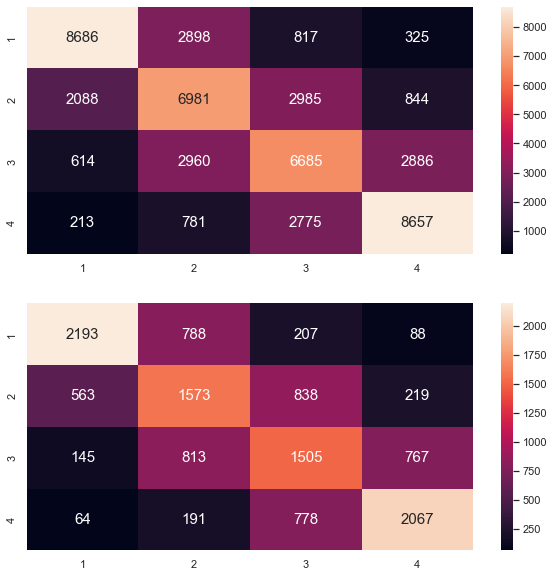

In [95]:
y_pred_test1 = model_nonEGIN1.predict(X_test)
y_pred_train1 = model_nonEGIN1.predict(X_train)

print('F1 Score for Train Data:', f1_score(y_train, y_pred_train1, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_pred_test1, average='macro'))

print('\nClassificiation Report on Test Data:\n', metrics.classification_report(y_test, y_pred_test1))


fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, y_pred_train1), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_pred_test1), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>See the most Important/Significant variables in the new Tuned Model that determine what factor affects one's salary the most as predicted by our Model</b>

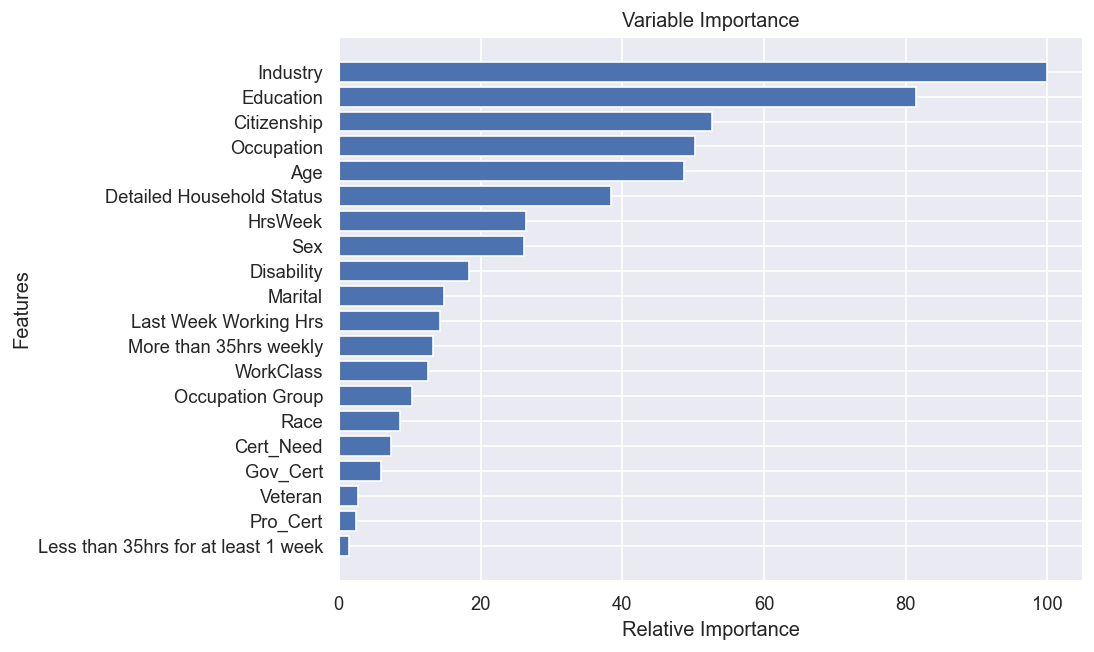

Importance of each variable in Graph above(Desc. Order):
 [100.    81.47  52.62  50.31  48.7   38.37  26.41  26.08  18.36  14.9
  14.26  13.3   12.62  10.28   8.59   7.38   6.     2.77   2.43   1.38]


In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot feature importance
feature_importance = model_nonEGIN1.feature_importances_

#make importances relative to max importance
feature_importance = 100.0*(feature_importance/feature_importance.max())
sorted_idx  = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])+0.5

#plot the features
plt.figure(figsize=(8, 6), dpi=120)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.iloc[ : , sorted_idx])
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.title("Variable Importance")

plt.show()

temp=feature_importance
temp=np.sort(temp)
temp=np.round_(temp, decimals = 2)
print("Importance of each variable in Graph above(Desc. Order):\n",temp[::-1])

<b>Training the Tuned Model with the data from our feature engineered dataset</b>

In [99]:
#train CB model with EGIN values
model_EGIN1 = CBC1.fit(X_trainEGIN, y_train.values.ravel())

0:	learn: 1.3335392	total: 123ms	remaining: 2m 3s
1:	learn: 1.2908489	total: 244ms	remaining: 2m 1s
2:	learn: 1.2594247	total: 391ms	remaining: 2m 10s
3:	learn: 1.2332424	total: 511ms	remaining: 2m 7s
4:	learn: 1.2105509	total: 659ms	remaining: 2m 11s
5:	learn: 1.1919036	total: 745ms	remaining: 2m 3s
6:	learn: 1.1746140	total: 823ms	remaining: 1m 56s
7:	learn: 1.1614769	total: 926ms	remaining: 1m 54s
8:	learn: 1.1488165	total: 1.11s	remaining: 2m 2s
9:	learn: 1.1378601	total: 1.21s	remaining: 1m 59s
10:	learn: 1.1275136	total: 1.3s	remaining: 1m 56s
11:	learn: 1.1184537	total: 1.38s	remaining: 1m 53s
12:	learn: 1.1109531	total: 1.5s	remaining: 1m 53s
13:	learn: 1.1043384	total: 1.59s	remaining: 1m 52s
14:	learn: 1.0983845	total: 1.69s	remaining: 1m 51s
15:	learn: 1.0925725	total: 1.8s	remaining: 1m 50s
16:	learn: 1.0873842	total: 1.89s	remaining: 1m 49s
17:	learn: 1.0825330	total: 2.03s	remaining: 1m 50s
18:	learn: 1.0785232	total: 2.15s	remaining: 1m 50s
19:	learn: 1.0750670	total: 2.

159:	learn: 0.9773037	total: 12.9s	remaining: 1m 7s
160:	learn: 0.9770431	total: 13s	remaining: 1m 7s
161:	learn: 0.9769106	total: 13s	remaining: 1m 7s
162:	learn: 0.9766264	total: 13.1s	remaining: 1m 7s
163:	learn: 0.9765085	total: 13.2s	remaining: 1m 7s
164:	learn: 0.9764029	total: 13.2s	remaining: 1m 6s
165:	learn: 0.9761956	total: 13.3s	remaining: 1m 6s
166:	learn: 0.9760744	total: 13.3s	remaining: 1m 6s
167:	learn: 0.9758710	total: 13.4s	remaining: 1m 6s
168:	learn: 0.9757394	total: 13.4s	remaining: 1m 6s
169:	learn: 0.9755818	total: 13.5s	remaining: 1m 5s
170:	learn: 0.9753230	total: 13.5s	remaining: 1m 5s
171:	learn: 0.9751838	total: 13.6s	remaining: 1m 5s
172:	learn: 0.9749883	total: 13.6s	remaining: 1m 5s
173:	learn: 0.9746790	total: 13.7s	remaining: 1m 4s
174:	learn: 0.9745243	total: 13.7s	remaining: 1m 4s
175:	learn: 0.9744048	total: 13.8s	remaining: 1m 4s
176:	learn: 0.9743035	total: 13.8s	remaining: 1m 4s
177:	learn: 0.9741024	total: 13.9s	remaining: 1m 4s
178:	learn: 0.97

321:	learn: 0.9561517	total: 22.6s	remaining: 47.5s
322:	learn: 0.9560884	total: 22.6s	remaining: 47.4s
323:	learn: 0.9559876	total: 22.6s	remaining: 47.2s
324:	learn: 0.9559070	total: 22.7s	remaining: 47.1s
325:	learn: 0.9558133	total: 22.7s	remaining: 46.9s
326:	learn: 0.9557557	total: 22.7s	remaining: 46.8s
327:	learn: 0.9556940	total: 22.8s	remaining: 46.7s
328:	learn: 0.9555860	total: 22.9s	remaining: 46.6s
329:	learn: 0.9554704	total: 22.9s	remaining: 46.6s
330:	learn: 0.9553887	total: 23s	remaining: 46.5s
331:	learn: 0.9553245	total: 23.1s	remaining: 46.4s
332:	learn: 0.9552063	total: 23.1s	remaining: 46.4s
333:	learn: 0.9550797	total: 23.2s	remaining: 46.3s
334:	learn: 0.9549747	total: 23.3s	remaining: 46.2s
335:	learn: 0.9549045	total: 23.4s	remaining: 46.1s
336:	learn: 0.9548407	total: 23.4s	remaining: 46.1s
337:	learn: 0.9547590	total: 23.5s	remaining: 46s
338:	learn: 0.9545366	total: 23.6s	remaining: 45.9s
339:	learn: 0.9544498	total: 23.6s	remaining: 45.9s
340:	learn: 0.95

484:	learn: 0.9430360	total: 29.1s	remaining: 30.9s
485:	learn: 0.9429557	total: 29.1s	remaining: 30.8s
486:	learn: 0.9429047	total: 29.1s	remaining: 30.7s
487:	learn: 0.9428381	total: 29.2s	remaining: 30.6s
488:	learn: 0.9427533	total: 29.2s	remaining: 30.5s
489:	learn: 0.9426838	total: 29.2s	remaining: 30.4s
490:	learn: 0.9426213	total: 29.3s	remaining: 30.3s
491:	learn: 0.9425855	total: 29.3s	remaining: 30.3s
492:	learn: 0.9425299	total: 29.3s	remaining: 30.2s
493:	learn: 0.9424827	total: 29.4s	remaining: 30.1s
494:	learn: 0.9424093	total: 29.4s	remaining: 30s
495:	learn: 0.9423579	total: 29.4s	remaining: 29.9s
496:	learn: 0.9422843	total: 29.4s	remaining: 29.8s
497:	learn: 0.9421961	total: 29.4s	remaining: 29.7s
498:	learn: 0.9421206	total: 29.5s	remaining: 29.6s
499:	learn: 0.9420649	total: 29.5s	remaining: 29.5s
500:	learn: 0.9419959	total: 29.5s	remaining: 29.4s
501:	learn: 0.9418950	total: 29.5s	remaining: 29.3s
502:	learn: 0.9417860	total: 29.5s	remaining: 29.2s
503:	learn: 0.

646:	learn: 0.9324074	total: 33.5s	remaining: 18.3s
647:	learn: 0.9323757	total: 33.5s	remaining: 18.2s
648:	learn: 0.9323129	total: 33.6s	remaining: 18.1s
649:	learn: 0.9322926	total: 33.6s	remaining: 18.1s
650:	learn: 0.9322366	total: 33.6s	remaining: 18s
651:	learn: 0.9322145	total: 33.6s	remaining: 18s
652:	learn: 0.9321291	total: 33.7s	remaining: 17.9s
653:	learn: 0.9320765	total: 33.7s	remaining: 17.8s
654:	learn: 0.9320347	total: 33.7s	remaining: 17.8s
655:	learn: 0.9319782	total: 33.7s	remaining: 17.7s
656:	learn: 0.9318971	total: 33.8s	remaining: 17.6s
657:	learn: 0.9318733	total: 33.8s	remaining: 17.6s
658:	learn: 0.9318144	total: 33.8s	remaining: 17.5s
659:	learn: 0.9317092	total: 33.9s	remaining: 17.4s
660:	learn: 0.9316102	total: 33.9s	remaining: 17.4s
661:	learn: 0.9315775	total: 33.9s	remaining: 17.3s
662:	learn: 0.9315212	total: 33.9s	remaining: 17.3s
663:	learn: 0.9314695	total: 34s	remaining: 17.2s
664:	learn: 0.9314253	total: 34s	remaining: 17.1s
665:	learn: 0.931373

805:	learn: 0.9233040	total: 40.6s	remaining: 9.76s
806:	learn: 0.9232473	total: 40.6s	remaining: 9.72s
807:	learn: 0.9231938	total: 40.7s	remaining: 9.67s
808:	learn: 0.9231365	total: 40.8s	remaining: 9.63s
809:	learn: 0.9230912	total: 40.8s	remaining: 9.58s
810:	learn: 0.9230235	total: 40.9s	remaining: 9.53s
811:	learn: 0.9229613	total: 41s	remaining: 9.49s
812:	learn: 0.9229006	total: 41.1s	remaining: 9.45s
813:	learn: 0.9228375	total: 41.1s	remaining: 9.4s
814:	learn: 0.9227863	total: 41.2s	remaining: 9.35s
815:	learn: 0.9226625	total: 41.3s	remaining: 9.31s
816:	learn: 0.9226177	total: 41.4s	remaining: 9.26s
817:	learn: 0.9225618	total: 41.4s	remaining: 9.22s
818:	learn: 0.9225076	total: 41.5s	remaining: 9.17s
819:	learn: 0.9224414	total: 41.6s	remaining: 9.13s
820:	learn: 0.9223727	total: 41.6s	remaining: 9.08s
821:	learn: 0.9223545	total: 41.7s	remaining: 9.03s
822:	learn: 0.9223227	total: 41.8s	remaining: 8.98s
823:	learn: 0.9222861	total: 41.8s	remaining: 8.94s
824:	learn: 0.9

970:	learn: 0.9150250	total: 48.6s	remaining: 1.45s
971:	learn: 0.9149889	total: 48.6s	remaining: 1.4s
972:	learn: 0.9149295	total: 48.6s	remaining: 1.35s
973:	learn: 0.9148908	total: 48.6s	remaining: 1.3s
974:	learn: 0.9148427	total: 48.7s	remaining: 1.25s
975:	learn: 0.9147769	total: 48.7s	remaining: 1.2s
976:	learn: 0.9147287	total: 48.7s	remaining: 1.15s
977:	learn: 0.9147066	total: 48.7s	remaining: 1.1s
978:	learn: 0.9146661	total: 48.8s	remaining: 1.05s
979:	learn: 0.9146368	total: 48.8s	remaining: 996ms
980:	learn: 0.9146074	total: 48.8s	remaining: 945ms
981:	learn: 0.9145781	total: 48.8s	remaining: 895ms
982:	learn: 0.9145557	total: 48.9s	remaining: 845ms
983:	learn: 0.9144957	total: 48.9s	remaining: 795ms
984:	learn: 0.9144372	total: 49s	remaining: 745ms
985:	learn: 0.9143908	total: 49s	remaining: 696ms
986:	learn: 0.9143324	total: 49s	remaining: 646ms
987:	learn: 0.9142764	total: 49.1s	remaining: 596ms
988:	learn: 0.9142427	total: 49.1s	remaining: 546ms
989:	learn: 0.9141977	

F1 Score for Train Data: 0.609592846807218
F1 Score for Test Data: 0.5757717655064261

Classificiation Report on Test Data:
               precision    recall  f1-score   support

           1       0.74      0.67      0.70      3276
           2       0.47      0.49      0.48      3193
           3       0.45      0.47      0.46      3230
           4       0.66      0.67      0.66      3100

    accuracy                           0.57     12799
   macro avg       0.58      0.57      0.58     12799
weighted avg       0.58      0.57      0.58     12799



<AxesSubplot:>

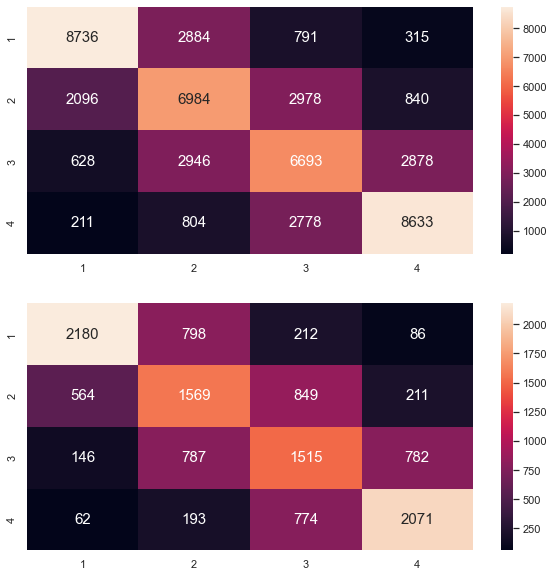

In [100]:
y_pred_testEGIN1 = model_EGIN1.predict(X_testEGIN)
y_pred_trainEGIN1 = model_EGIN1.predict(X_trainEGIN)

print('F1 Score for Train Data:', f1_score(y_train, y_pred_trainEGIN1, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_pred_testEGIN1, average='macro'))

print('\nClassificiation Report on Test Data:\n', metrics.classification_report(y_test, y_pred_testEGIN1))

fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, y_pred_trainEGIN1), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_pred_testEGIN1), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])


<b>See the most Important/Significant variables in the new Tuned Model that determine what factor affects one's salary the most as predicted by our Model</b>

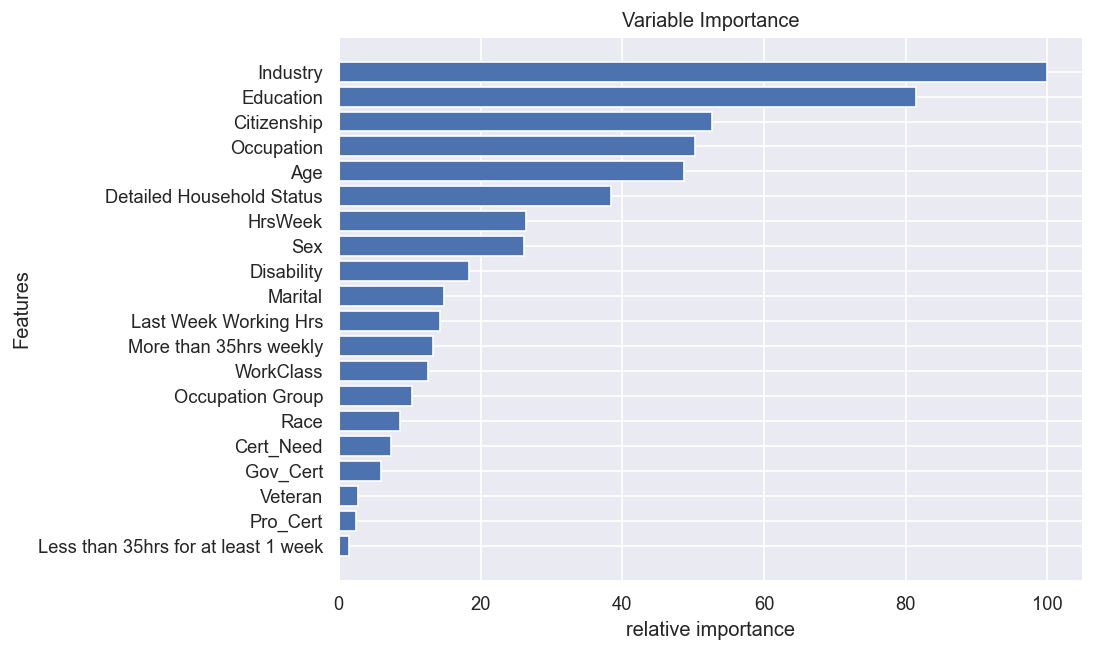

Importance of each variable in Graph above(Desc. Order):
 [100.    81.47  52.62  50.31  48.7   38.37  26.41  26.08  18.36  14.9
  14.26  13.3   12.62  10.28   8.59   7.38   6.     2.77   2.43   1.38]


In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot features importance
feature_importance1 = model_EGIN1.feature_importances_
#make importances relative to max importance
feature_importance1 = 100.0*(feature_importance/feature_importance.max())
sorted_idx1  = np.argsort(feature_importance1)
pos1 = np.arange(sorted_idx1.shape[0])+0.5

#plot the features
plt.figure(figsize=(8, 6), dpi=120)
plt.barh(pos1, feature_importance1[sorted_idx1], align='center')
plt.yticks(pos1, X_test.iloc[ : , sorted_idx1])
plt.xlabel("relative importance")
plt.ylabel("Features")
plt.title("Variable Importance")

plt.show()

temp1=feature_importance1
temp1=np.sort(temp1)
temp1=np.round_(temp1, decimals = 2)
print("Importance of each variable in Graph above(Desc. Order):\n",temp1[::-1])

<h3>Final Insights</h3>

<b>Final Insights</b>
<ol>
<li>Results Analysis for the Random Grid Search-> After 125 iterations in the Random Grid Search with different optimal hyperparameters, we noticed a slight improvement in the f1-scores of the CatBoost Classifier model on both the regular (f-1 score = 0.5759 after tuning vs f-1 score = 0.57006 on the initial model) and feature engineered dataset (f-1 score = 0.57577 after tuning vs f-1 score = 0.56786 on the initial model). We believe with a more GPU-intensive hardware, we can further improve these accuracy scores by trying a higher iteration number for our Random Grid Search. </li>       
<br>
<li>Feature Engineering-> Initially the feature engineered dataset performed worse than our regular dataset on the base CatBoost Model, however after tuning our model, we were able to close the gap in terms of accuracy. After tunning, the feature engineered dataset performed just as well as as our regular dataset in terms of accuracy with the f-1 score</li>
<br>
<li>Optimal Features-> After we tuned our model, we found the most relevant features to our model and thus the most consequential features affecting a person’s salary: the industry they are working in (most significant), the level of education they have attained, their citizen status and lastly the person’s age. Some features were a little less relevant to determine one’s salary: Whether you work less than 35 hours a week (least significant), whether you have a government-issued Professional Certificate and whether you are an army veteran</li>
<br>
<li>Checking for Overfitting-> After tuning, both the training and test set accuracy are still quite comparable, much closer in f1-scores than other ML models, and this is one of the key benefits of using the CatBoost model as it is specially designed to prevent overfitting of data. Thus there was no overfitting with the model.</li>
<br>
<li>Overall Model Evaluation-> The CatBoost Classifier does in fact perform much better than the Decision Tree and some other ML models we implemented as seen by the differences in the F1-scores across them. We can conclude that this is the 2nd best performing ML model that we have implemented to solve our defined problem as to what determines a person’s income.</li>
</ol>  